In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Button(description='Upload and Classify', style=ButtonStyle())

Saving abrasions (10).jpg to abrasions (10) (1).jpg
Saving abrasions (15).jpg to abrasions (15).jpg
Saving abrasions (17).jpg to abrasions (17) (1).jpg
Saving abrasions (19).jpg to abrasions (19).jpg
Saving abrasions (28).jpg to abrasions (28).jpg
Saving abrasions (29).jpg to abrasions (29).jpg
Saving abrasions (31).jpg to abrasions (31).jpg
Saving abrasions (34).jpg to abrasions (34).jpg
Saving abrasions (49).jpg to abrasions (49).jpg
Saving abrasions (51).jpg to abrasions (51).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


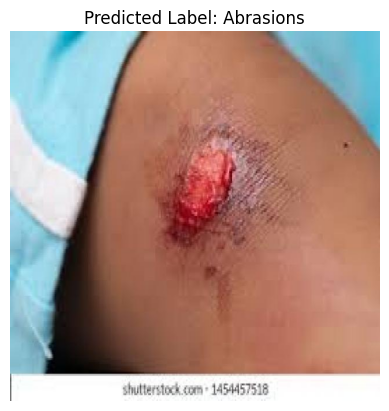

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


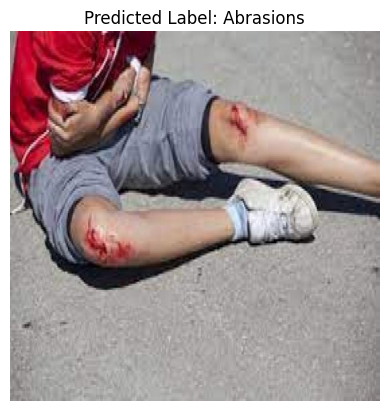

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


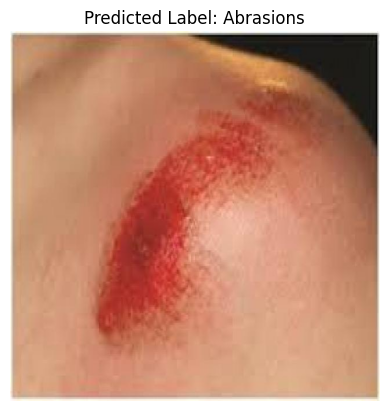

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


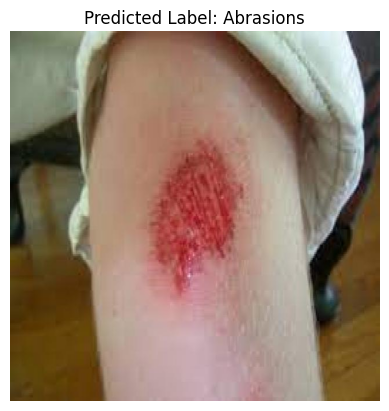

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


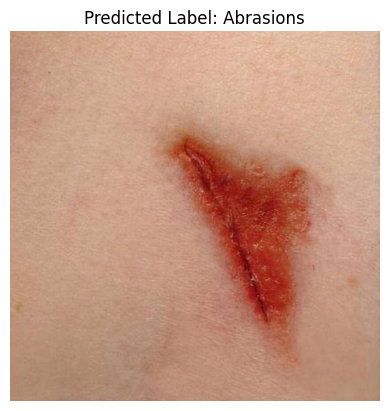

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


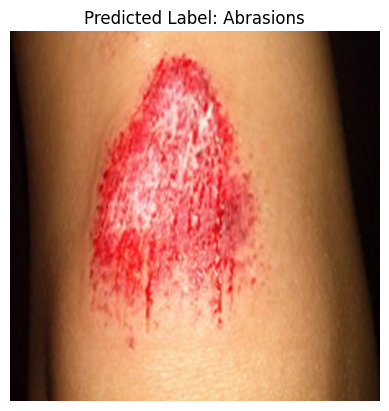

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


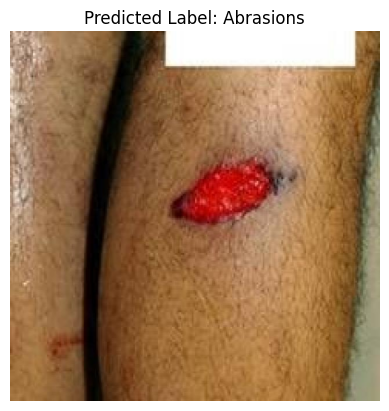

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


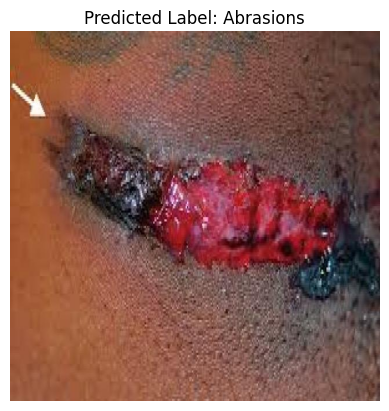

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


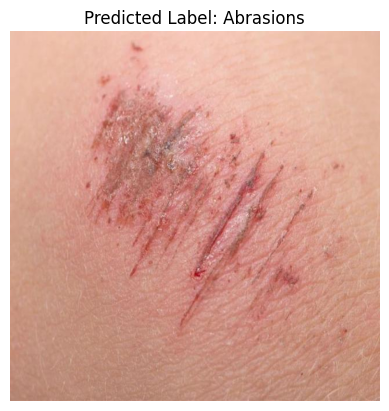

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


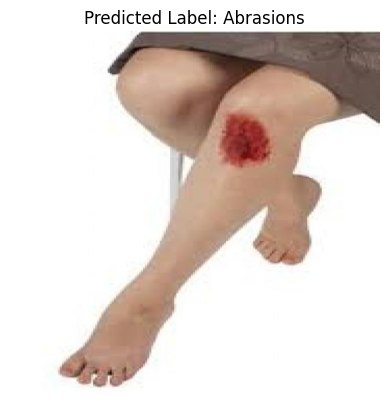

In [64]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input
from google.colab import files
from IPython.display import display
import ipywidgets as widgets
from sklearn.preprocessing import LabelEncoder


model_path = '/content/drive/MyDrive/Collected and Categorized Wound Images (1).h5'
model = load_model(model_path)


def preprocess_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (299, 299))
    img = img.astype('float32')
    img = preprocess_input(img)
    return img


def classify_image(btn):
    uploaded = files.upload()
    for filename in uploaded.keys():
        img = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), cv2.IMREAD_COLOR)
        img_processed = preprocess_image(img)
        img_processed = np.expand_dims(img_processed, axis=0)


        predictions = model.predict(img_processed)
        predicted_class_index = np.argmax(predictions)
        predicted_label = label_encoder.classes_[predicted_class_index]


        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'Predicted Label: {predicted_label}')
        plt.show()


upload_button = widgets.Button(description="Upload and Classify")
upload_button.on_click(classify_image)
display(upload_button)